## Import Packages

In [38]:
import cv2
from cv2 import saliency
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from skimage.filters import threshold_otsu
import numpy as np
from google.colab.patches import cv2_imshow

## Load Image

In [39]:
dir1 = '/content/DALL-E 1.png'
dir2 = '/content/DALL-E 2.png'
dir3 = '/content/DALL-E 3.png'

In [40]:
original1 = cv2.imread(dir1)  # BGR
original1 = cv2.cvtColor(original1, cv2.COLOR_BGR2RGB)

image1 = original1.copy()

original2 = cv2.imread(dir2)  # BGR
original2 = cv2.cvtColor(original2, cv2.COLOR_BGR2RGB)

image2 = original2.copy()

original3 = cv2.imread(dir3)  # BGR
original3 = cv2.cvtColor(original3, cv2.COLOR_BGR2RGB)

image3 = original3.copy()

## Process Images

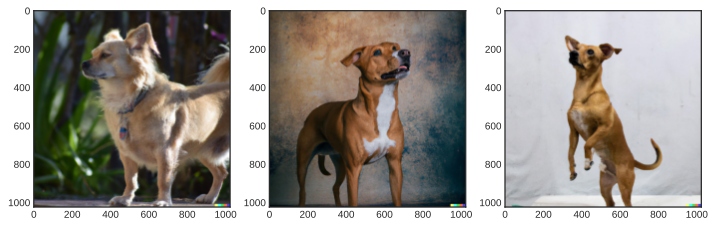

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

imgs = [image1, image2, image3]

_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

## Set up saliency detection object

In [42]:
# Initialise OpenCV's static saliency SPECTRAL RESIDUAL DETECTOR and compute saliency map
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

In [43]:
(success1, saliencyMap1) = saliency.computeSaliency(image1)
saliencyMap1 = (saliencyMap1 * 255).astype("uint8")

(success2, saliencyMap2) = saliency.computeSaliency(image2)
saliencyMap2 = (saliencyMap2 * 255).astype("uint8")

(success3, saliencyMap3) = saliency.computeSaliency(image3)
saliencyMap3 = (saliencyMap3 * 255).astype("uint8")

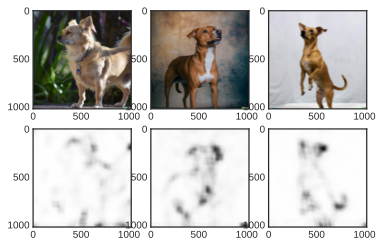

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

imgs = [image1, image2, image3,
        saliencyMap1, saliencyMap2, saliencyMap3]

_, axs = plt.subplots(2, 3)
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [50]:
# Initialise the more fine-grained saliency detector and compute the saliencyMap
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

In [51]:
(success1, saliencyMap1) = saliency.computeSaliency(image1)
saliencyMap1 = (saliencyMap1 * 255).astype("uint8")

(success2, saliencyMap2) = saliency.computeSaliency(image2)
saliencyMap2 = (saliencyMap2 * 255).astype("uint8")

(success3, saliencyMap3) = saliency.computeSaliency(image3)
saliencyMap3 = (saliencyMap3 * 255).astype("uint8")

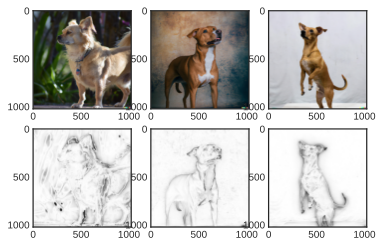

In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

imgs = [image1, image2, image3,
        saliencyMap1, saliencyMap2, saliencyMap3]

_, axs = plt.subplots(2, 3)
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [53]:
threshMap1 = cv2.threshold(saliencyMap1.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
threshMap2 = cv2.threshold(saliencyMap2.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
threshMap3 = cv2.threshold(saliencyMap3.astype("uint8"), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

## Useful to perform otsu-thresholding to find the binary representation of the saliency map

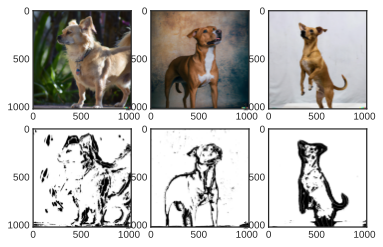

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

imgs = [image1, image2, image3,
        threshMap1, threshMap2, threshMap3]

_, axs = plt.subplots(2, 3)
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()